<a href="https://colab.research.google.com/github/delyuu/Flavor-Scape-/blob/main/FlavorScope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="75kFyxhKlmDx0h5yk9W4")
project = rf.workspace("ggsharshitha").project("vegetables-fruits-finder")
version = project.version(1)
dataset = version.download("tfrecord")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vegetables-&-Fruits-Finder-1 in tfrecord:: 100%|██████████| 11/11 [00:00<00:00, 650.22it/s]


In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Load Dataset**

In [ ]:
# Gunakan dataset bawaan dari TensorFlow sebagai contoh (misalnya, CIFAR-10)
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Pilih subset dataset untuk simulasi (misalnya, hanya 5 kelas pertama)
classes = 5
x_train = x_train[y_train.flatten() < classes]
y_train = y_train[y_train.flatten() < classes]
x_test = x_test[y_test.flatten() < classes]
y_test = y_test[y_test.flatten() < classes]

# Split dataset
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# **Praproses Data**

Resize, normalisasi, dan augmentasi dataset

In [ ]:
# Normalisasi
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

# Augmentasi data
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
])

# **Bangun Model**

Menggunakan arsitektur CNN sederhana

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),  # Definisikan input pertama
    data_augmentation,  # Tambahkan augmentasi data
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(classes, activation='softmax')
])

# **Compile Model**

Atur optimizer, loss function, dan metrics:

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# **Latih Model**

Latih model menggunakan dataset

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 114ms/step - accuracy: 0.4016 - loss: 1.3575 - val_accuracy: 0.5766 - val_loss: 1.0600
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.5659 - loss: 1.0739 - val_accuracy: 0.6256 - val_loss: 0.9688
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.5988 - loss: 1.0055 - val_accuracy: 0.6730 - val_loss: 0.8712
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 106ms/step - accuracy: 0.6357 - loss: 0.9357 - val_accuracy: 0.6740 - val_loss: 0.8529
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.6517 - loss: 0.9008 - val_accuracy: 0.6872 - val_loss: 0.8131
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.6687 - loss: 0.8492 - val_accuracy: 0.6970 - val_loss: 0.8144
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.6924 - loss: 0.8041 - val_accuracy: 0.6918 - val_loss: 0.8149
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.6949 - loss: 0

# **Evaluasi Model**

Uji performa model pada dataset testing

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7794 - loss: 0.5975
Test Accuracy: 77.58%


# **Visualisasi Hasil**
Tampilkan grafik akurasi dan loss

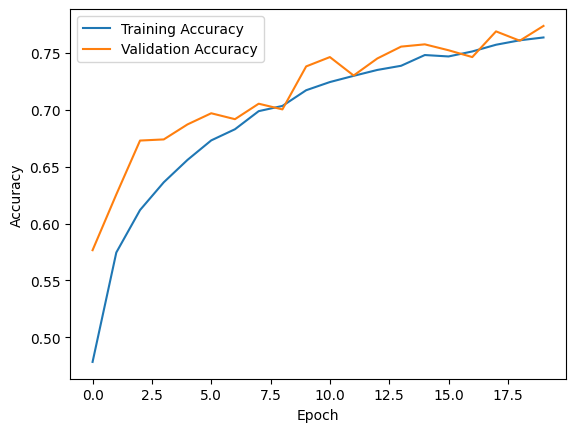

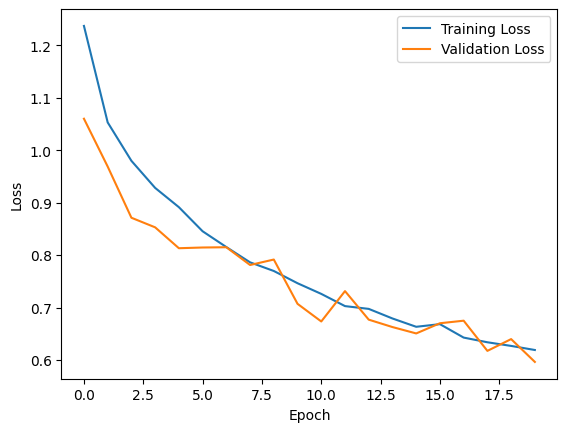

In [ ]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Simpan Model**
Simpan model untuk digunakan di aplikasi

In [ ]:
model.save("ingredient_recognition_model.keras")

# **Prediksi**

Gunakan model untuk memprediksi gambar bahan makanan

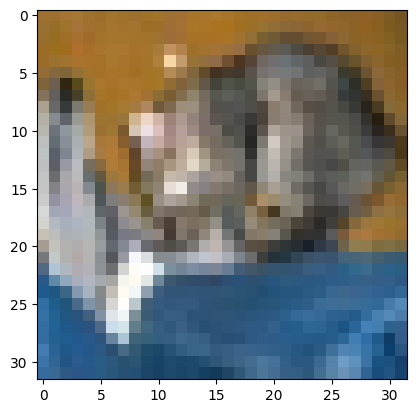

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
Predicted Class: 0


In [ ]:
def predict_ingredient(image):
    image = tf.image.resize(image, (32, 32)) / 255.0
    image = tf.expand_dims(image, axis=0)  # Tambahkan batch dimension
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions)
    return predicted_label

# Contoh prediksi
sample_image = x_test[0]
plt.imshow(sample_image)
plt.show()
print(f"Predicted Class: {predict_ingredient(sample_image)}")